# Who am I?

[Hassan Ait Nacer](https://github.com/hassanaitnacer)

# Setup

In this section, we will perform the necessary setup steps to run the notebook. The first step is to install the required libraries. In this case, we will be installing TensorFlow Decision Forests library with the following command:

In [ ]:
!pip install tensorflow_decision_forests

This library provides implementation of random forest algorithm in TensorFlow and will be used to train our model.

# Importing Libraries

In this section, we will perform the necessary setup steps to run the notebook. The first step is to import the required libraries. The following libraries will be used in this notebook:

In [ ]:
import statistics
import numpy as np 
import pandas as pd
import seaborn as sns
import tensorflow as tf
import missingno as msno
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf

import warnings
warnings.filterwarnings("ignore")

from tensorflow import keras

# Downloading Dataset

In this section, we will download the dataset we will be using to train our model. We will be using the `machine-predictive-maintenance-classification` dataset from Kaggle. The following commands will be used to download the dataset:

In [ ]:
# Create a directory called .kaggle in the root directory.
!mkdir ~/.kaggle

In [ ]:
# Copy the kaggle.json file that contains the API credentials to the .kaggle
# directory.
!cp kaggle.json ~/.kaggle/

In [ ]:
#Change the permissions of the kaggle.json file.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset.
!kaggle datasets download -d shivamb/machine-predictive-maintenance-classification

100% 137k/137k [00:00<00:00, 338kB/s]
100% 137k/137k [00:00<00:00, 338kB/s]


In [ ]:
# Unzip the downloaded dataset.
!unzip machine-predictive-maintenance-classification.zip

Archive:  machine-predictive-maintenance-classification.zip
  inflating: predictive_maintenance.csv  


# Loading Data

In this section, we will load the dataset into the notebook for further analysis and preprocessing. We will use the Pandas library to read the dataset from the csv file and store it in a DataFrame object. The following code will be used to load the data:

In [ ]:
# Read the dataset from the csv file and store it in a DataFrame.
df = pd.read_csv("./predictive_maintenance.csv")

# Drop some unnecessary columns.
df = df.drop(columns=["UDI","Product ID", "Failure Type"])

# Display the first few rows.
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [ ]:
# Convert the temperature columns from Kelvin to Celsius by subtracting 272.15
# from the values.
df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Rename the columns to make them more readable.
df.rename(
    columns={
        "Air temperature [K]" : "Air temperature",
        "Process temperature [K]" : "Process temperature",
        "Rotational speed [rpm]" : "Rotational speed",
        "Torque [Nm]" : "Torque",
        "Tool wear [min]" : "Tool wear"
    },
    inplace=True
)

# Add a new column "Temperature difference"
df["Temperature difference"] = df["Process temperature"] - df["Air temperature"]

In [ ]:
# Get some basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Type                    10000 non-null  object 
 1   Air temperature         10000 non-null  float64
 2   Process temperature     10000 non-null  float64
 3   Rotational speed        10000 non-null  int64  
 4   Torque                  10000 non-null  float64
 5   Tool wear               10000 non-null  int64  
 6   Target                  10000 non-null  int64  
 7   Temperature difference  10000 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 625.1+ KB


In [ ]:
# Check the statistics of the dataset.
df.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Temperature difference
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


# Statistics

In this section, we will perform some statistical analysis on the dataset to gain a deeper understanding of the data.

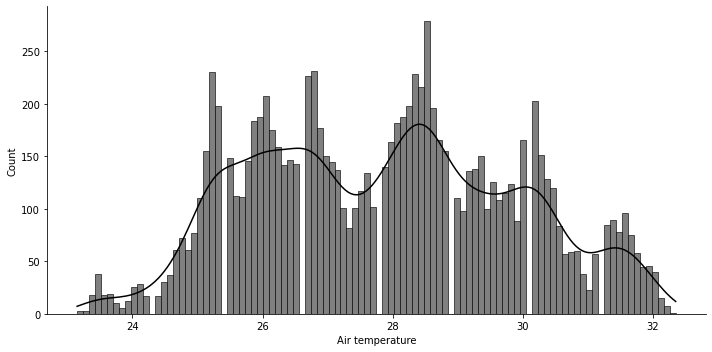

In [ ]:
# Create a probability density plot of the "Air temperature" feature.
sns.displot(
    data=df,
    x="Air temperature",
    kde=True,
    bins=100,
    color="black",
    facecolor="gray",
    height=5,
    aspect=2
)

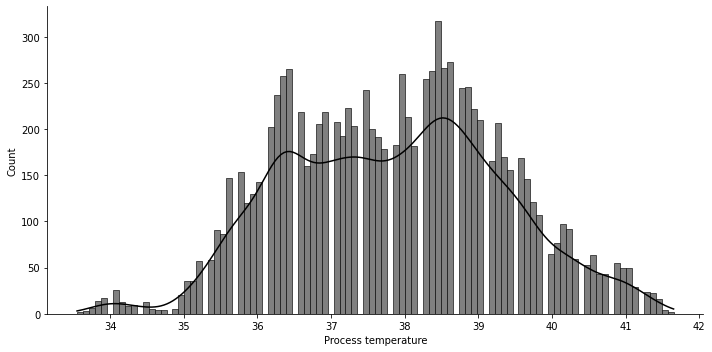

In [ ]:
# Create a probability density plot of the "Process temperature" feature.
sns.displot(
    data=df,
    x="Process temperature",
    kde=True,
    bins=100,
    color="black",
    facecolor="gray",
    height=5,
    aspect=2
)

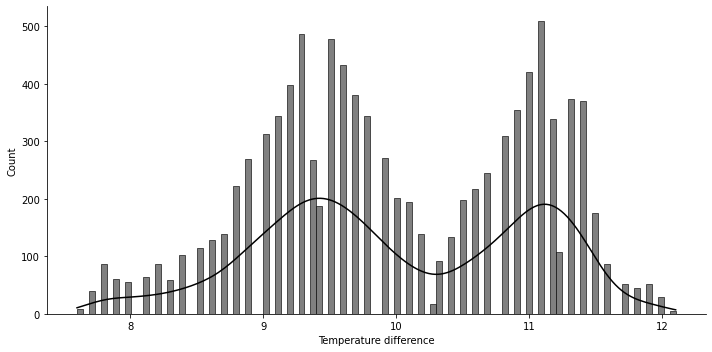

In [ ]:
# Create a probability density plot of the "Temperature difference" feature.
sns.displot(
    data=df,
    x="Temperature difference",
    kde=True,
    bins=100,
    color="black",
    facecolor="gray",
    height=5,
    aspect=2
)

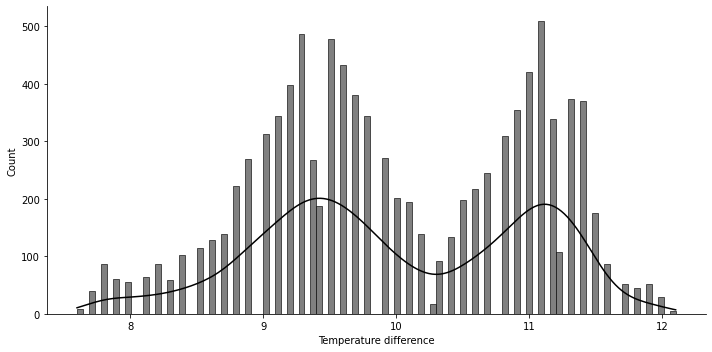

In [ ]:
# Create a probability density plot of the "Temperature difference" feature.
sns.displot(
    data=df,
    x="Temperature difference",
    kde=True,
    bins=100,
    color="black",
    facecolor="gray",
    height=5,
    aspect=2
)

Text(0.5, 1.0, 'Type')

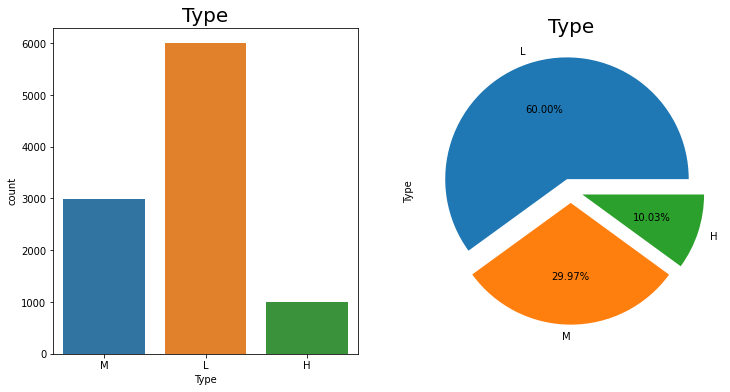

In [ ]:
# Create a countplot and pie chart of the "Type" feature.
ax = plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1)
ax = sns.countplot(x='Type', data=df)
plt.title("Type", fontsize=20)
ax =plt.subplot(1, 2, 2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.2f%%')
ax.set_title(label = "Type", fontsize=20)

Text(0.5, 1.0, 'Target')

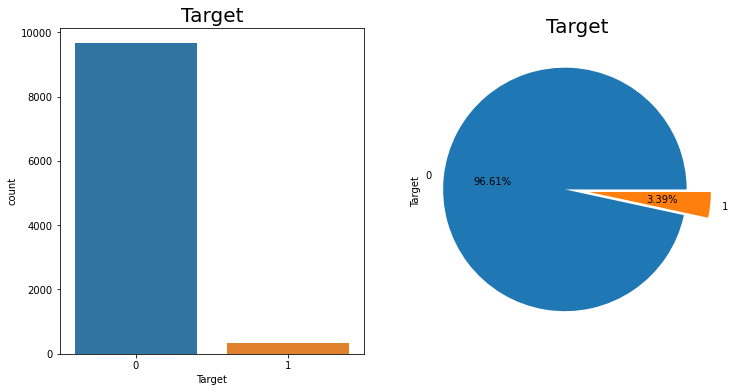

In [ ]:
# Create a countplot and pie chart of the "Target" feature.
ax = plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1)
ax = sns.countplot(x='Target', data=df)
plt.title("Target", fontsize=20)
ax =plt.subplot(1, 2, 2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%')
ax.set_title(label = "Target", fontsize=20)

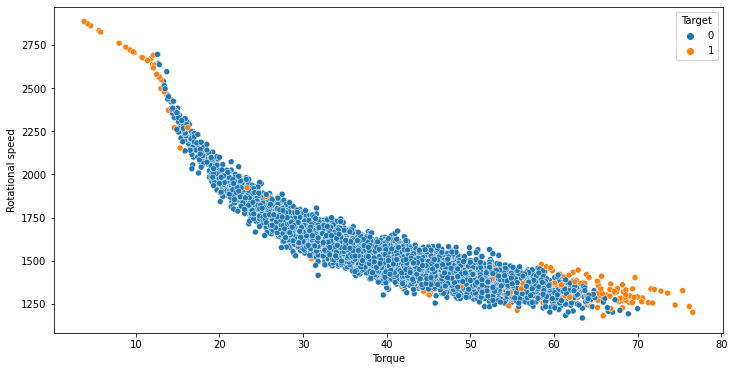

In [ ]:
# Create a scatterplot of the "Torque" and "Rotational speed" features, with
# the "Target" feature used for coloring the points.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Torque", y="Rotational speed", hue="Target", palette="tab10")

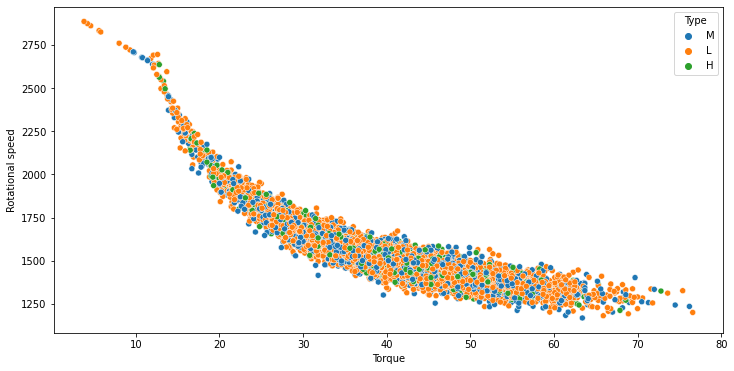

In [ ]:
# Create a scatterplot of the "Torque" and "Rotational speed" features, with
# the "Type" feature used for coloring the points.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Torque", y="Rotational speed", hue="Type", palette="tab10")

# Training a Random Forest model

In this section, we will train a random forest model using the TensorFlow Decision Forests library.

## Load the dataset and convert it in a tf.Dataset

In [ ]:
# Split the dataset into a training and a testing dataset.
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_df, test_df = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(len(train_df), len(test_df)))

7059 examples in training, 2941 examples for testing.


In [ ]:
label = 'Target'

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=label)

## Train the model

In this section, we will continue to train a random forest model using the TensorFlow Decision Forests library.

In [ ]:
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

Use /tmp/tmpokckftxh as temporary training directory
Reading training dataset...


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training dataset read in 0:00:03.630654. Found 7059 examples.
Training model...
Model trained in 0:00:01.338145
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


## Evaluate the model

In this section, we will evaluate the performance of the trained model using the test set. We will use the predict function from the trained model to predict the labels of the test set.

In [ ]:
model.compile(metrics=["accuracy"])
model.evaluate(test_ds)

3/3 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 0.9901


[0.0, 0.9901394248008728]

In [ ]:
# [
#     'Type',
#     'Air_temperature',
#     'Process_temperature',
#     'Rotational_speed',
#     'Torque',
#     'Tool_wear',
#     'Temperature_difference'
# ]

## Plotting the Model

In this section, we will plot the decision tree structure of the random forest model.

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=4)

## Saving the Model for Production

In this section, we will save the trained model so that it can be used for making predictions in a production environment.

In [ ]:
model.save("./machine-failure")

In [ ]:
!zip -r machine-failure.zip ./machine-failure

  adding: machine-failure/ (stored 0%)
  adding: machine-failure/fingerprint.pb (stored 0%)
  adding: machine-failure/assets/ (stored 0%)
  adding: machine-failure/assets/3b9ed184d8094eafnodes-00000-of-00001 (deflated 78%)
  adding: machine-failure/assets/3b9ed184d8094eafheader.pb (deflated 26%)
  adding: machine-failure/assets/3b9ed184d8094eafdone (stored 0%)
  adding: machine-failure/assets/3b9ed184d8094eafrandom_forest_header.pb (deflated 86%)
  adding: machine-failure/assets/3b9ed184d8094eafdata_spec.pb (deflated 11%)
  adding: machine-failure/variables/ (stored 0%)
  adding: machine-failure/variables/variables.index (deflated 46%)
  adding: machine-failure/variables/variables.data-00000-of-00001 (deflated 62%)
  adding: machine-failure/keras_metadata.pb (deflated 79%)
  adding: machine-failure/saved_model.pb (deflated 88%)
